In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Parameters
n = 5  # Number of arms
t = 500  # Number of trials
positive_reward = 1
negative_reward = 0

true_rewards = np.random.rand(n)

In [19]:
true_rewards

array([0.13459361, 0.49270617, 0.58867557, 0.98933427, 0.90981628])

In [3]:
# Function to simulate the environment
def simulate_environment(arm):
    return np.random.choice([positive_reward, negative_reward], p=[true_rewards[arm], 1 - true_rewards[arm]])

In [4]:
# Exploration and Exploitation
def exploration_exploitation():
    rewards = np.zeros(t)
    for trial in range(t):
        if trial < n:  
            arm = trial
        else:  
            arm = np.argmax(rewards[:trial])
        rewards[trial] = simulate_environment(arm)
    return rewards

In [5]:
# Fixed Exploration then Exploitation
def fixed_exploration_exploitation(fixed_trials=100):
    rewards = np.zeros(t)
    for trial in range(t):
        if trial < fixed_trials:
            arm = trial % n  
        else:
            arm = np.argmax(rewards[:fixed_trials])  
        rewards[trial] = simulate_environment(arm)
    return rewards

In [6]:
# Epsilon-Greedy Algorithm
def epsilon_greedy(epsilon=0.1):
    rewards = np.zeros(t)
    counts = np.zeros(n)  
    estimates = np.zeros(n)  
    
    for trial in range(t):
        if np.random.rand() < epsilon:
            arm = np.random.randint(n)  # Explore
        else:
            arm = np.argmax(estimates)  # Exploit
        
        reward = simulate_environment(arm)
        counts[arm] += 1
        estimates[arm] += (reward - estimates[arm]) / counts[arm]  
        rewards[trial] = reward
    
    return rewards

In [7]:
# Epsilon-Greedy with UCB
def epsilon_greedy_ucb(epsilon=0.1):
    rewards = np.zeros(t)
    counts = np.zeros(n)  
    estimates = np.zeros(n)  
    
    for trial in range(t):
        if np.random.rand() < epsilon:
            arm = np.random.randint(n)  # Explore
        else:
            ucb_values = estimates + np.sqrt((2 * np.log(trial + 1)) / (counts + 1e-5))  # UCB calculation
            arm = np.argmax(ucb_values)  # Exploit based on UCB
        
        reward = simulate_environment(arm)
        counts[arm] += 1
        estimates[arm] += (reward - estimates[arm]) / counts[arm]  
        rewards[trial] = reward
    
    return rewards


In [8]:
# Run simulations
exploration_exploitation_rewards = exploration_exploitation()
fixed_exploration_rewards = fixed_exploration_exploitation()
epsilon_greedy_rewards = epsilon_greedy(epsilon=0.1)
epsilon_greedy_ucb_rewards = epsilon_greedy_ucb(epsilon=0.1)

In [9]:
# Calculate cumulative rewards for plotting
cumulative_rewards_exploration_exploitation = np.cumsum(exploration_exploitation_rewards)
cumulative_rewards_fixed_exploration = np.cumsum(fixed_exploration_rewards)
cumulative_rewards_epsilon_greedy = np.cumsum(epsilon_greedy_rewards)
cumulative_rewards_epsilon_greedy_ucb = np.cumsum(epsilon_greedy_ucb_rewards)

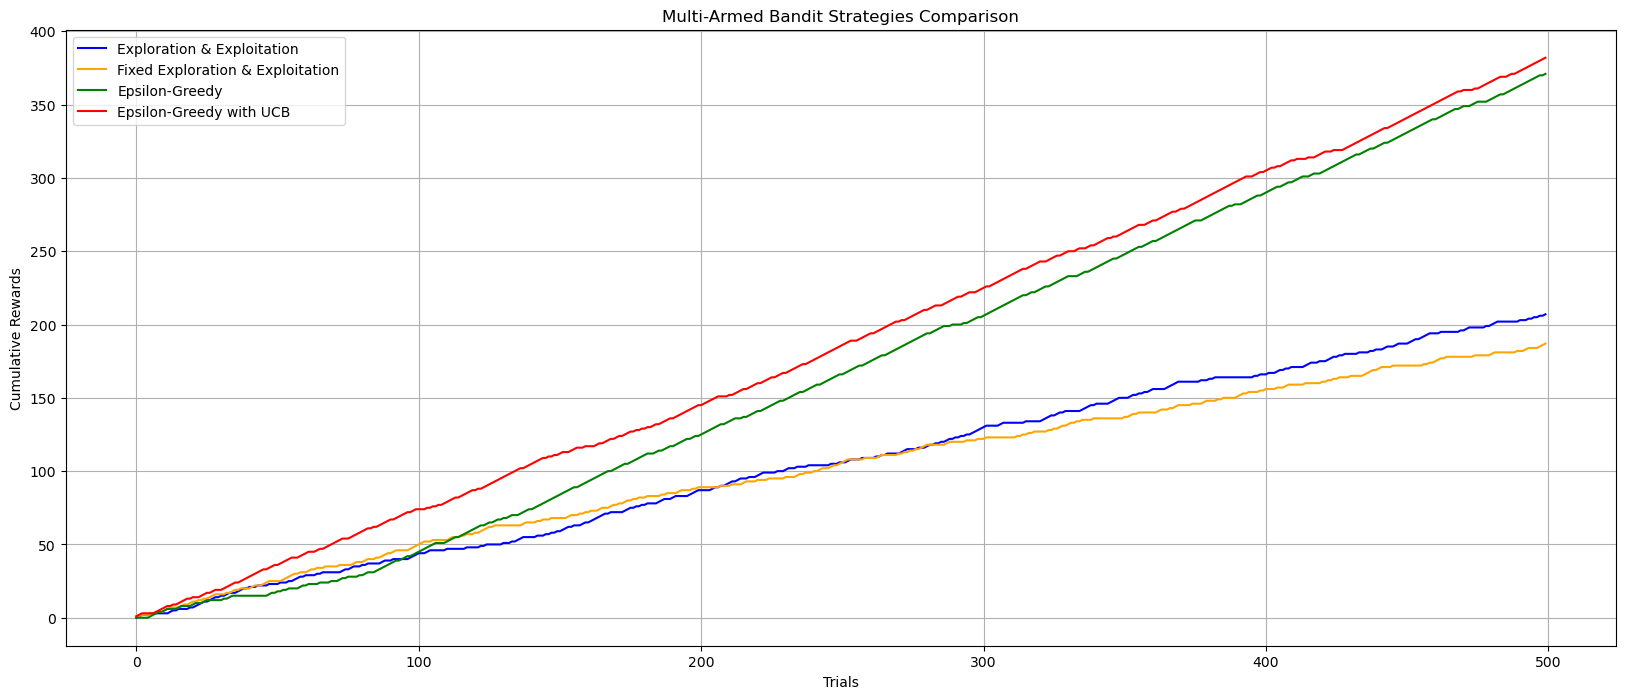

In [23]:
# Plotting results
plt.figure(figsize=(20, 8))
plt.plot(cumulative_rewards_exploration_exploitation, label='Exploration & Exploitation', color='blue')
plt.plot(cumulative_rewards_fixed_exploration, label='Fixed Exploration & Exploitation', color='orange')
plt.plot(cumulative_rewards_epsilon_greedy, label='Epsilon-Greedy', color='green')
plt.plot(cumulative_rewards_epsilon_greedy_ucb, label='Epsilon-Greedy with UCB', color='red')
plt.xlabel('Trials')
plt.ylabel('Cumulative Rewards')
plt.title('Multi-Armed Bandit Strategies Comparison')
plt.legend()
plt.grid()
plt.show()

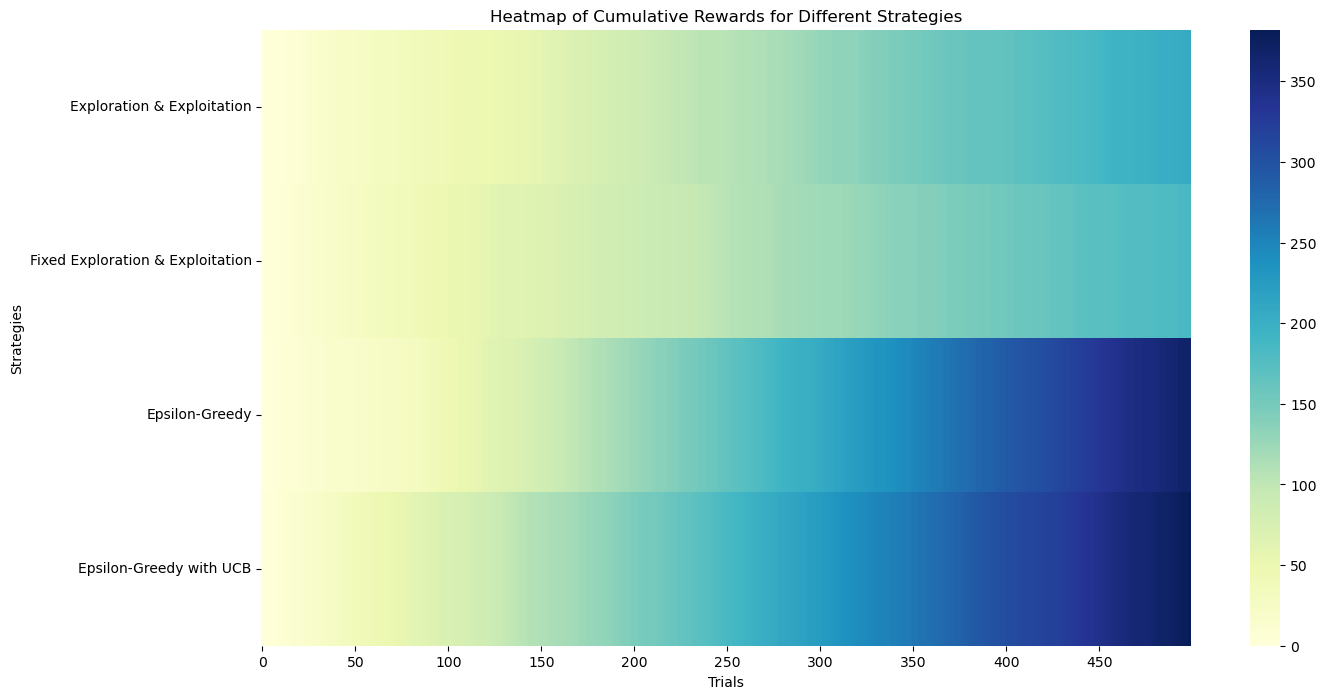

In [24]:
# Stack the cumulative rewards for each strategy into a 2D array
all_rewards = np.array([
    cumulative_rewards_exploration_exploitation,
    cumulative_rewards_fixed_exploration,
    cumulative_rewards_epsilon_greedy,
    cumulative_rewards_epsilon_greedy_ucb
])

# Create a heatmap to show how each strategy performs over the trials
plt.figure(figsize=(15, 8))
sns.heatmap(all_rewards, cmap='YlGnBu', annot=False, xticklabels=50, yticklabels=[
             'Exploration & Exploitation', 'Fixed Exploration & Exploitation', 'Epsilon-Greedy', 'Epsilon-Greedy with UCB'])
plt.xlabel('Trials')
plt.ylabel('Strategies')
plt.title('Heatmap of Cumulative Rewards for Different Strategies')
plt.show()

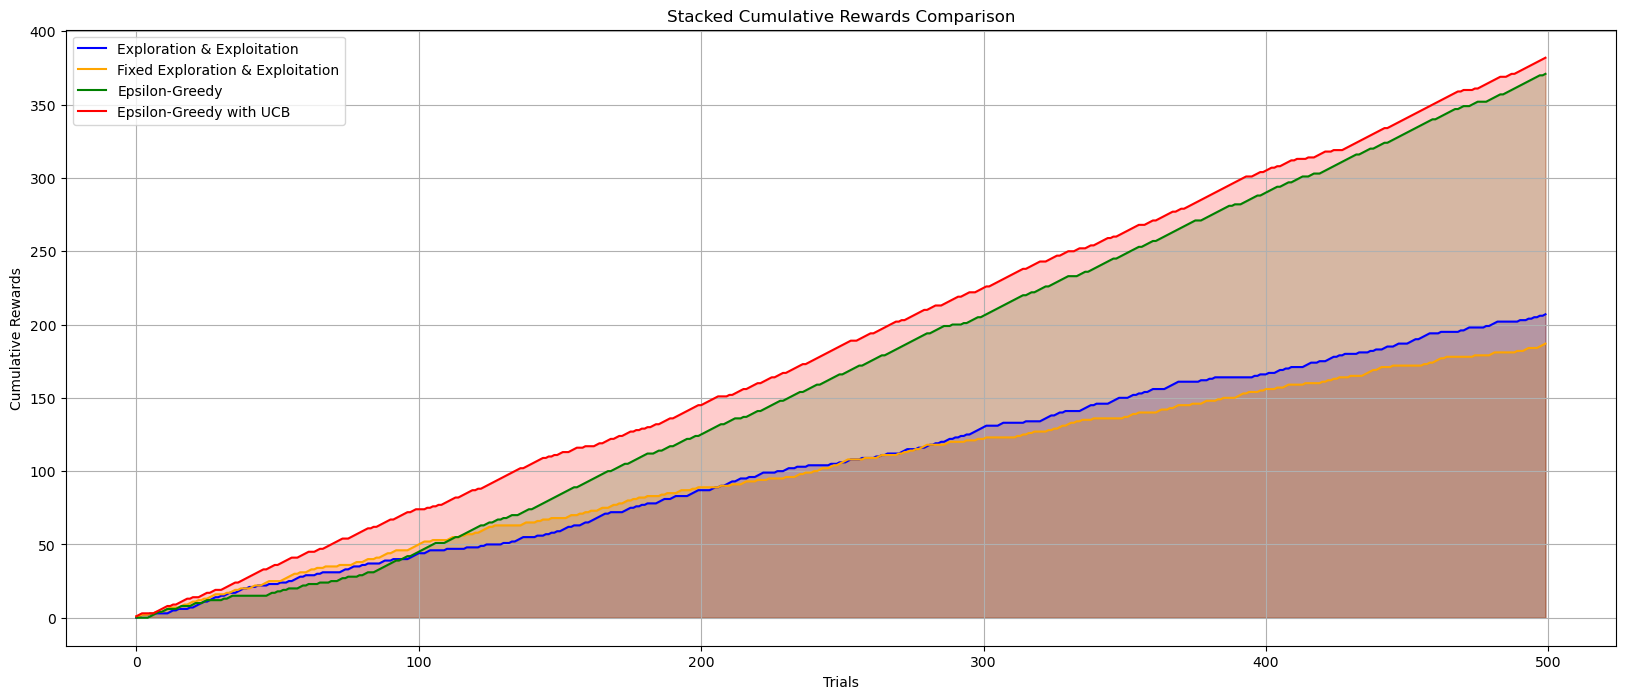

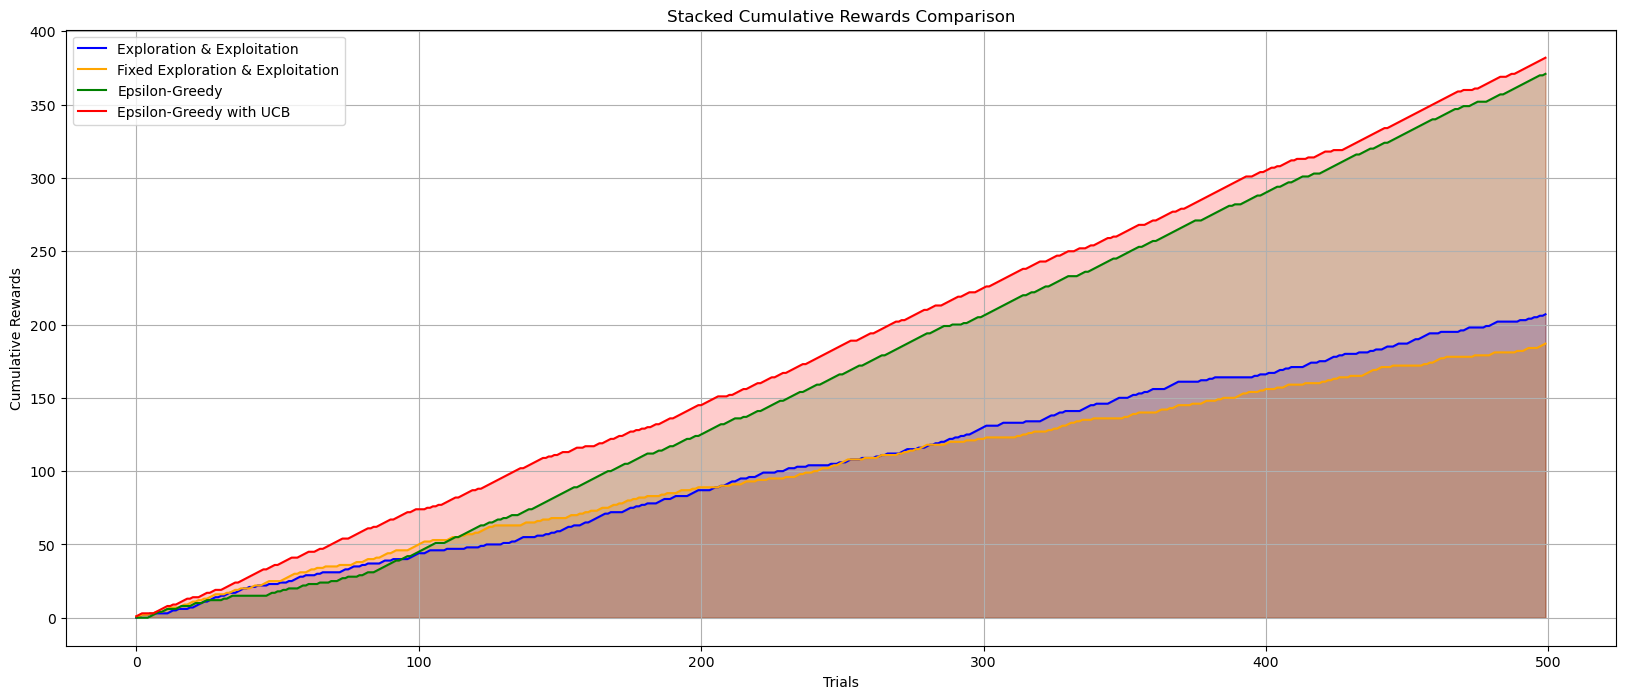

In [25]:
plt.figure(figsize=(20, 8))

# Stacked line plot for cumulative rewards
plt.plot(cumulative_rewards_exploration_exploitation, label='Exploration & Exploitation', color='blue')
plt.plot(cumulative_rewards_fixed_exploration, label='Fixed Exploration & Exploitation', color='orange')
plt.plot(cumulative_rewards_epsilon_greedy, label='Epsilon-Greedy', color='green')
plt.plot(cumulative_rewards_epsilon_greedy_ucb, label='Epsilon-Greedy with UCB', color='red')

plt.fill_between(range(len(cumulative_rewards_exploration_exploitation)),
                 cumulative_rewards_exploration_exploitation, color='blue', alpha=0.2)
plt.fill_between(range(len(cumulative_rewards_fixed_exploration)),
                 cumulative_rewards_fixed_exploration, color='orange', alpha=0.2)
plt.fill_between(range(len(cumulative_rewards_epsilon_greedy)),
                 cumulative_rewards_epsilon_greedy, color='green', alpha=0.2)
plt.fill_between(range(len(cumulative_rewards_epsilon_greedy_ucb)),
                 cumulative_rewards_epsilon_greedy_ucb, color='red', alpha=0.2)

plt.xlabel('Trials')
plt.ylabel('Cumulative Rewards')
plt.title('Stacked Cumulative Rewards Comparison')
plt.legend()
plt.grid(True)
plt.show()